<a href="https://www.kaggle.com/code/vijays140291/tensorflow-randomforestclassifierlogisticregressio?scriptVersionId=122981075" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier

# Loading the Dataset

In [426]:
df=pd.read_csv('/kaggle/input/visceral-adipose/visceral_fat.csv')
#loading the dataset
df

,number,age (years),ethnicity,diabetes mellitus,mean diastolic bp (mmhg),mean systolic bp (mmhg),central armellini fat (mm),current gestational age,pregnancies (number),first fasting glucose (mg/dl),bmi pregestational (kg/m),gestational age at birth,type of delivery,child birth weight (g),gestational dm
0,1,20,NaN,0,73.5,125.0,28.10,"12,1",1.0,NaN,33.20,"41,0",1,3840,0
1,2,28,0.0,0,75.5,112.0,43.10,"11,5",1.0,76.0,21.50,"39,1",0,2810,0
2,5,21,1.0,0,70.5,116.0,41.40,"12,6",1.0,86.0,21.41,"39,5",0,2455,0
3,9,25,0.0,0,92.5,167.0,39.60,"16,2",4.0,NaN,55.36,"39,4",0,3400,0
4,13,33,1.0,0,79.0,137.0,67.80,"11,2",2.0,86.0,30.85,"40,2",1,3930,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,278,21,0.0,0,74.5,128.5,13.90,"10,4",2.0,81.0,21.22,"38,3",0,3775,0
129,280,22,0.0,0,84.0,125.0,69.05,"7,5",2.0,114.0,36.64,"37,3",1,3565,1
130,283,19,1.0,0,76.0,140.5,52.50,"20,0",2.0,88.0,23.62,"40,3",1,3260,0
131,285,23,1.0,0,83.5,122.5,31.45,"10,5",1.0,NaN,28.76,"40,6",1,3270,0


# Getting the Preliminary Information

In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   number                         133 non-null    int64  
 1   age (years)                    133 non-null    int64  
 2   ethnicity                      132 non-null    float64
 3   diabetes mellitus              133 non-null    int64  
 4   mean diastolic bp (mmhg)       133 non-null    float64
 5   mean systolic bp (mmhg)        133 non-null    float64
 6   central armellini fat (mm)     133 non-null    float64
 7   current gestational age        133 non-null    object 
 8   pregnancies (number)           128 non-null    float64
 9   first fasting glucose (mg/dl)  103 non-null    float64
 10  bmi pregestational (kg/m)      132 non-null    float64
 11  gestational age at birth       133 non-null    object 
 12  type of delivery               133 non-null    int

# Checking the Missing Values

In [428]:
df.isna().sum()

number                            0
age (years)                       0
ethnicity                         1
diabetes mellitus                 0
mean diastolic bp (mmhg)          0
mean systolic bp (mmhg)           0
central armellini fat (mm)        0
current gestational age           0
pregnancies (number)              5
first fasting glucose (mg/dl)    30
bmi pregestational (kg/m)         1
gestational age at birth          0
type of delivery                  0
child birth weight (g)            0
gestational dm                    0
dtype: int64

# Preprocessing Function

In [429]:
def preprocess_inputs(df):
    df=df.copy()
    #filling the ethnicity column with mode of the column
    df['ethnicity']=df['ethnicity'].fillna(df['ethnicity'].mode()[0])
    df['first fasting glucose (mg/dl)']=df['first fasting glucose (mg/dl)'].fillna(df['first fasting glucose (mg/dl)'].mode()[0])
    df['pregnancies (number)']=df['pregnancies (number)'].fillna(df['pregnancies (number)'].mean())
    df['bmi pregestational (kg/m)']=df['bmi pregestational (kg/m)'].fillna(df['bmi pregestational (kg/m)'].mean())
    
    df['current gestational age 1']=df['current gestational age'].apply(lambda x:x.split(',')[0])
    df['current gestational age 2']=df['current gestational age'].apply(lambda x:x.split(',')[1])
    
    df['gestational age at birth 1']=df['gestational age at birth'].apply(lambda x:x.split(',')[0])
    df['gestational age at birth 2']=df['gestational age at birth'].apply(lambda x:x.split(',')[1])
    
    df=df.drop(['current gestational age','gestational age at birth'],axis=1)
    
    
    y=df['type of delivery']
    x=df.drop('type of delivery',axis=1)
    

    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True)
    
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
    x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
    
    
    
    
    return x_train,x_test,y_train,y_test

In [430]:
x_train,x_test,y_train,y_test=preprocess_inputs(df)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(93, 16)
(40, 16)
(93,)
(40,)


# Logistic Regression

In [431]:
model=LogisticRegression()
model.fit(x_train,y_train)
print(model.score(x_test,y_test))

0.675


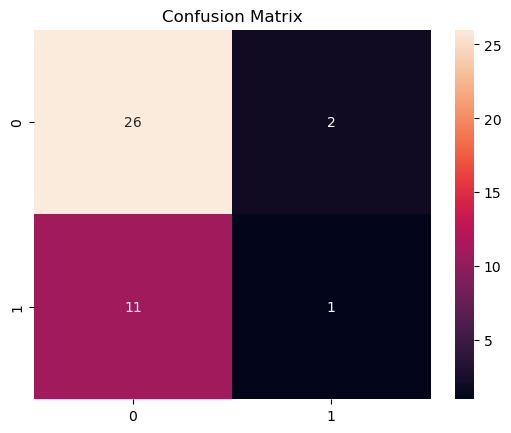

In [432]:
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [433]:
x_train.shape

(93, 16)

# Neural Network

In [434]:
inputs=tf.keras.Input(shape=(16,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

In [435]:
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_57 (Dense)            (None, 64)                1088      
                                                                 
 dense_58 (Dense)            (None, 64)                4160      
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [436]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,validation_split=0.2,epochs=100,
                 callbacks=[tf.keras.callbacks.ReduceLROnPlateau()],verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 210ms/step - loss: 0.2638 - accuracy: 0.4865 - val_loss: 0.2512 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2397 - accuracy: 0.5405 - val_loss: 0.2359 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 3/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2198 - accuracy: 0.6351 - val_loss: 0.2232 - val_accuracy: 0.6316 - lr: 0.0010
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.2033 - accuracy: 0.7568 - val_loss: 0.2140 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1888 - accuracy: 0.7973 - val_loss: 0.2082 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.1766 - accuracy: 0.7973 - val_loss: 0.2048 - val_accuracy: 0.7368 - lr: 0.0010
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 0.1673 - 

In [437]:
model.evaluate(x_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [438]:
threshold=0.5
y_pred=np.squeeze(model.predict(x_test))
y_pred=(y_pred>threshold).astype(np.int)

2/2 [==============================] - 0s 4ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [439]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

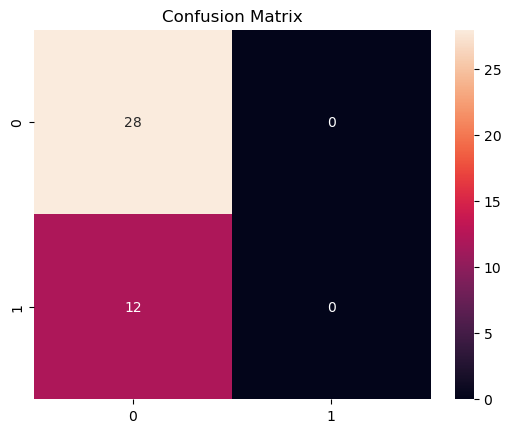

In [440]:

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [441]:
df['type of delivery'].value_counts()

0    101
1     32
Name: type of delivery, dtype: int64

# Random Forest Classifier

In [442]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
print(rf_model.score(x_test,y_test))

0.7


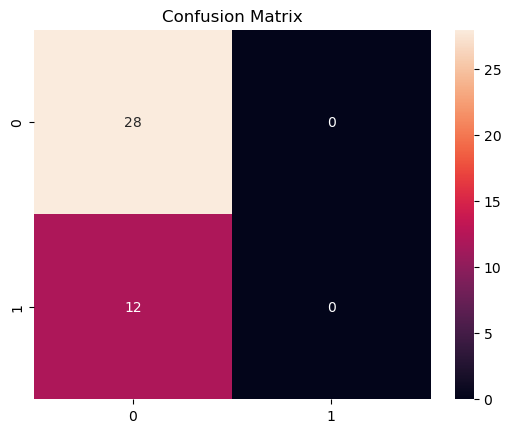

In [443]:
y_pred=rf_model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()